In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

In [2]:
df = pd.read_csv("HousingData.csv")
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


In [3]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [4]:
df = df.fillna(df.mean()) ### Her alanı o alanın ortalaması ile doldurur!
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [5]:
X = df.drop(columns=["MEDV"])
y = df["MEDV"]
X,y

(        CRIM    ZN  INDUS  CHAS    NOX     RM        AGE     DIS  RAD  TAX  \
 0    0.00632  18.0   2.31   0.0  0.538  6.575  65.200000  4.0900    1  296   
 1    0.02731   0.0   7.07   0.0  0.469  6.421  78.900000  4.9671    2  242   
 2    0.02729   0.0   7.07   0.0  0.469  7.185  61.100000  4.9671    2  242   
 3    0.03237   0.0   2.18   0.0  0.458  6.998  45.800000  6.0622    3  222   
 4    0.06905   0.0   2.18   0.0  0.458  7.147  54.200000  6.0622    3  222   
 ..       ...   ...    ...   ...    ...    ...        ...     ...  ...  ...   
 501  0.06263   0.0  11.93   0.0  0.573  6.593  69.100000  2.4786    1  273   
 502  0.04527   0.0  11.93   0.0  0.573  6.120  76.700000  2.2875    1  273   
 503  0.06076   0.0  11.93   0.0  0.573  6.976  91.000000  2.1675    1  273   
 504  0.10959   0.0  11.93   0.0  0.573  6.794  89.300000  2.3889    1  273   
 505  0.04741   0.0  11.93   0.0  0.573  6.030  68.518519  2.5050    1  273   
 
      PTRATIO       B      LSTAT  
 0       15.3  

## Scikit-Learn -> ML Algoritmalarını implemente edebildiğimiz kütüphane

In [6]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.210000
116,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,6,432,17.8,393.30,12.715432
45,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3,233,17.9,396.90,10.210000
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.580000
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24,666,20.2,368.74,18.130000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.520,5.836,91.9,2.2110,5,384,20.9,395.67,18.660000
270,0.29916,20.0,6.96,0.0,0.464,5.856,42.1,4.4290,3,223,18.6,388.65,13.000000
348,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.990000
435,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,24,666,20.2,109.85,23.270000


In [9]:
### LinearRegression
from sklearn.linear_model import LinearRegression

In [10]:
# ML algoritmaları CPU'da çalışır.
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
#prediction
y_pred = model.predict(X_test)
y_pred

# Modelin performansını ölç
# MAE,MSE,RMSE

# Mean Absolute Error -> Ortalama Mutlak Hata 
# Mean Squared Error -> Hataların karesini alarak toplar ve ortalamasını alır.
# Root Mean Squared Error -> MSE'nin karekönün alınmış hali.
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
#Program ortalama +- 3.14 dolar sapma (hata) yapıyor.
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
mae, mse, rmse # Daha düşük skor = Daha iyi model

# MAE => Ortalama kaç birim sapma var? +- 3.14K dolar
# MSE => MAE ile karşılaştırıp farka göre modelin ne kadar büyük hatalar yaptığını gözlemlenir. (Outlier, Aykırı Değer)

(3.141052567108399, 21.818457953525606, 4.671023223398231)

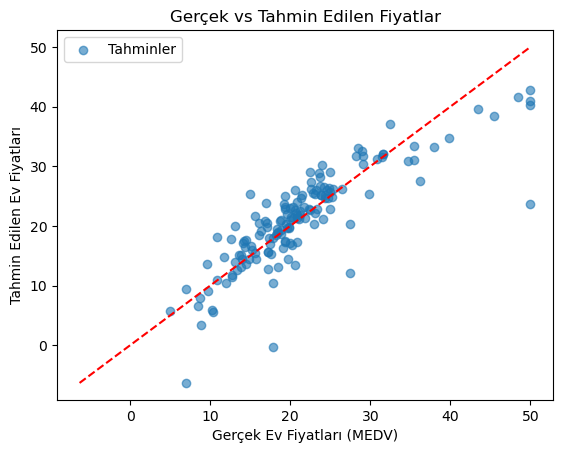

In [12]:
plot.scatter(y_test, y_pred, label="Tahminler", alpha=0.6)
plot.xlabel("Gerçek Ev Fiyatları (MEDV)")
plot.ylabel("Tahmin Edilen Ev Fiyatları")

min_val = min(y_test.min(), y_pred.min()) # en küçük değer
max_val = max(y_test.max(), y_pred.max()) # en büyük değer

plot.plot([min_val, max_val], [min_val,max_val], color="red", linestyle="--")
plot.title("Gerçek vs Tahmin Edilen Fiyatlar")
plot.legend()

In [13]:
coef_df =pd.DataFrame(model.coef_, X.columns, columns = ["Katsayı"]) # Coefficients
coef_df

# - (Negatif) -> Bu değişken artıkça ev fiyatı düşüyor. (Ters orantı)
# + (Pozitif) -> Bu değişken artıkça ev fiyatı artıyor. (Düz Orantı)

,Katsayı
CRIM,-0.128803
ZN,0.031913
INDUS,-0.010805
CHAS,3.689188
NOX,-13.963873
RM,4.418486
AGE,-0.026106
DIS,-1.432754
RAD,0.196898
TAX,-0.007219


In [14]:
X_test.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,11.083992,0.0,0.510,6.416,68.518519,2.6463,5,296,16.6,395.50,9.04
274,0.05644,40.0,6.410000,1.0,0.447,6.758,32.900000,4.0776,4,254,17.6,396.90,3.53
491,0.10574,0.0,27.740000,0.0,0.609,5.983,98.800000,1.8681,4,711,20.1,390.11,18.07
72,0.09164,0.0,10.810000,0.0,0.413,6.065,7.800000,5.2873,4,305,19.2,390.91,5.52
452,5.09017,0.0,18.100000,0.0,0.713,6.297,91.800000,2.3682,24,666,20.2,385.09,17.27


In [15]:
new_house = np.array(
    [
        [ 0.09178,0.0, 11.08, 0, 0.510, 6.416, 68.518, 2.6463, 5,296,16.6,395.50,9.04 ]
    ]
)


In [16]:
f"Eğitimde kullanılan özellik sayısı {X.shape[1]}"
f"Yeni verinin özellik sayısı {new_house.shape[1]}"


'Yeni verinin özellik sayısı 13'

In [17]:
feature_names = [ "CRIM", "ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT" ]
new_house_df = pd.DataFrame(new_house, columns=feature_names)
new_house_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.09178,0.0,11.08,0.0,0.51,6.416,68.518,2.6463,5.0,296.0,16.6,395.5,9.04


In [18]:
predicted_price = model.predict(new_house_df)
f"Girilen değerler için tahmin edilen fiyat: {predicted_price}"

'Girilen değerler için tahmin edilen fiyat: [28.94689911]'